# **Misión 3. Regresión Logistica**

Dentro de este notebook se realizara el proceso de misión 3 el cual consta de:

1. Análisis de la DB (Base de Datos).
2. Rellenar Datos Nulos
3. Imputación de Datos
4. Normalización de datos (pasar str a int o float)
5. Matriz de Correlación
6. Regresión Logistica

## 1. Análisis de la DB (Base de Datos)

### 1.1. Importar Base de Datos

In [ ]:
!curl -L -o /content/loan-approval-classification-data.zip https://www.kaggle.com/api/v1/datasets/download/taweilo/loan-approval-classification-data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  750k  100  750k    0     0   994k      0 --:--:-- --:--:-- --:--:--  994k


In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan-approval-classification-data.zip')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### 1.2. Librerías a usar:

In [ ]:
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # visualización de datos (mas bonito)
import pandas as pd # Manejo de datos en forma de tabla (Ya se importo previamente)
import numpy as np # se usa solo para algunas operaciones con arrays
from sklearn.model_selection import train_test_split # Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression # Modelo de Regresión Logistica
from sklearn.preprocessing import StandardScaler # Normalizar los datos segun la sigmoide (Rango de 0 a 1)
from sklearn.impute import SimpleImputer # Imputar datos faltantes (No se usa ya que no tenemos nulos)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve  # Comprobación del modelo
from sklearn.metrics import confusion_matrix, classification_report # Comprobación del modelo

### 1.3. Análisis de la Base de Datos

In [ ]:
df.shape # Esto nos muestra cuantas Filas y cuantas Columnas tiene el DF

(45000, 14)

In [ ]:
df.info() # Esto nos muestra cuales son las columnas y sus tipos de datos
          # También nos permite conocer que columnas tienen datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Según el `df.info()` ya podemos evaluar que la base de datos no tiene valores nulos ya que todas las columnas poseen los `45000` datos.

De igual manera se realiza el código `df.isnull().sum()` para confirmarlo de manera mas "grafica"

In [ ]:
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


Con esto se confirma que la DB no tiene valores nulos.

como análisis de nuestra base de datos se presentan las siguientes columnas:

- `person_age`: es la edad de la persona solicitante.
- `person_gender`: es el genero de la persona solicitante.
- `person_education`: Nivel educativo alcanzado por la persona solicitante.
- `person_income`: Ingresos de forma anual que tiene la perosna solicitante.
- `person_emp_exp`: Años de experiencia laboral de la persoan solicitante.
- `person_home_ownership`: Estado de la propiedad de la vivienda de la persona solicitante (por ejemplo, propiedad, alquiler, etc)
- `loan_amnt`: Monto del prestamo solicitado.
- `loan_int_rate`: Tasa de interes del prestamo solicitado.
- `loan_percent_income`: Monto del prstamo como porcentaje de los ingresos anuales del solicitante.
- `cb_person_cred_hist_length`: Duración del historial crediticio en años
- `credit_score`: Puntaje de crédito de la persona
- `previous_loan_defaults_on_file`: Indicador de impagos de préstamos anteriores
- `loan_status`: Estado de aprobación del préstamo: 1 = aprobado; 0 = rechazado

### 1.4. Visualización de datos Categoricos.

In [ ]:
def histograma(data: pd.Series, rango: int, color: str="", titulo: str="", xlabel: str="", ylabel: str=""):
  # genera un histograma con una campana de gauss (kde)
  # el kde no tiene área sombreada
  # resalta los q de cada grafico
  with plt.style.context('Solarize_Light2'):
    sns.histplot(data = data, bins = rango, color = color)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


In [ ]:
print(df['person_age'].value_counts().sort_index())
print(df['person_age'].mean())

person_age
20.0       17
21.0     1289
22.0     4236
23.0     5254
24.0     5138
25.0     4507
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
56.0       20
57.0       17
58.0       20
59.0        6
60.0       16
61.0       12
62.0        7
63.0        3
64.0        7
65.0       10
66.0       11
67.0        1
69.0        5
70.0        7
73.0        3
76.0        1
78.0        1
80.0        1
84.0        1
94.0        1
109.0       1
116.0       1
123.0       2
144.0       3
Name: count, dtype: int64
27.76417777777778


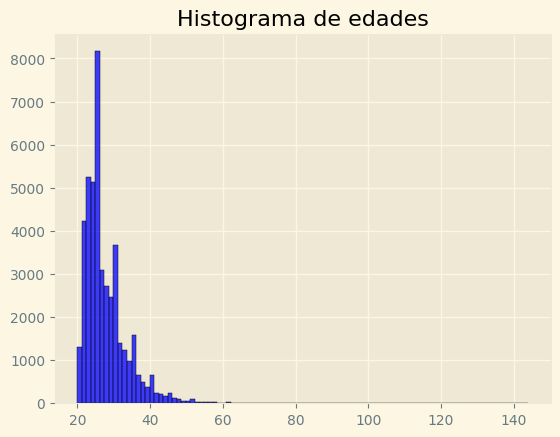

In [ ]:
histograma(df['person_age'],100,'blue',titulo='Histograma de edades')

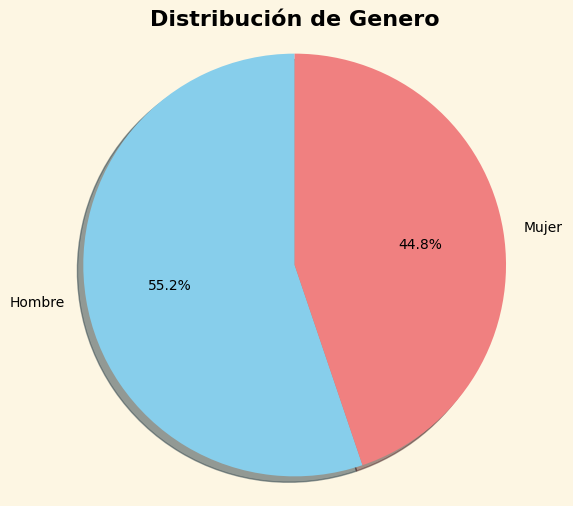

In [ ]:
# Calculate the value counts for person_gender
gender_counts = df['person_gender'].value_counts()

with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(6, 6))
  plt.pie(gender_counts, labels=['Hombre','Mujer'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], shadow=True)
  plt.title('Distribución de Genero', fontweight = 'bold')
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

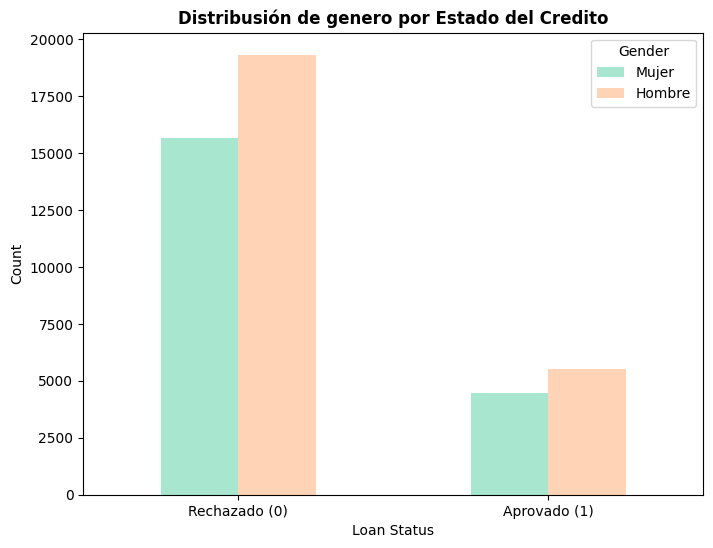

In [ ]:
# Group by loan_status and then by person_gender and count the occurrences
gender_loan_status_counts = df.groupby('loan_status')['person_gender'].value_counts().unstack()

# Plot the stacked bar chart
gender_loan_status_counts.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#A8E6CF','#FFD3B6'])
plt.title('Distribusión de genero por Estado del Credito', fontweight='bold')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rechazado (0)', 'Aprovado (1)'], rotation=0)
plt.legend(title='Gender', labels=['Mujer', 'Hombre'])
plt.show()

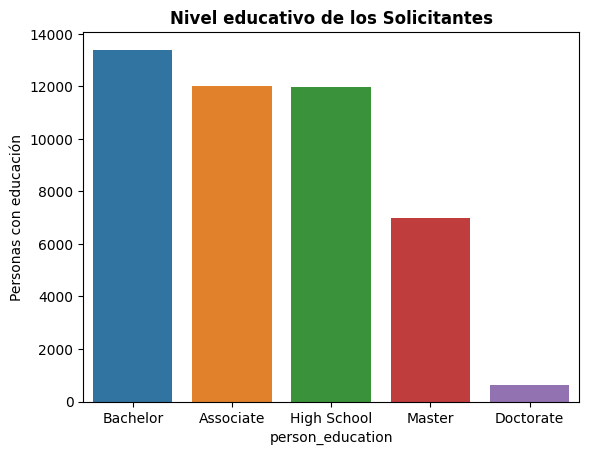

In [ ]:
education_counts = df['person_education'].value_counts().reset_index()
education_counts.columns = ['person_education', 'count']

sns.barplot(x='person_education', y='count', data=education_counts, hue='person_education', errorbar=None)
plt.ylabel('Personas con educación')
plt.title('Nivel educativo de los Solicitantes', fontweight='bold')
plt.show()

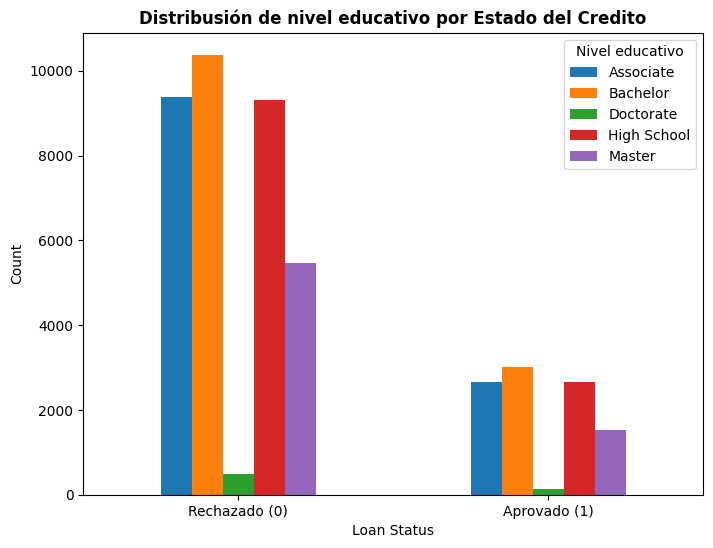

In [ ]:
# Group by loan_status and then by person_gender and count the occurrences
academic_level_loan_status_counts = df.groupby('loan_status')['person_education'].value_counts().unstack()

# Plot the stacked bar chart
academic_level_loan_status_counts.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Distribusión de nivel educativo por Estado del Credito', fontweight='bold')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rechazado (0)', 'Aprovado (1)'], rotation=0)
plt.legend(title='Nivel educativo')
plt.show()

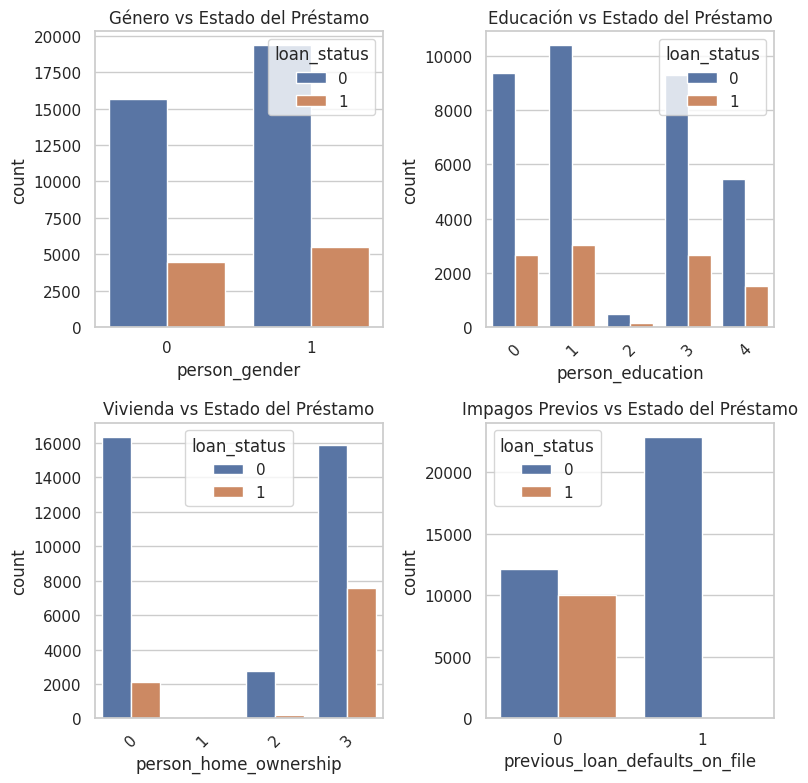

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Ejemplo 1: Género vs Estado del préstamo
sns.countplot(x='person_gender', hue='loan_status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Género vs Estado del Préstamo')

# Ejemplo 2: Educación vs Estado del préstamo
sns.countplot(x='person_education', hue='loan_status', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Educación vs Estado del Préstamo')
axes[0, 1].tick_params(axis='x', rotation=45)

# Ejemplo 3: Propiedad de vivienda vs Estado del préstamo
sns.countplot(x='person_home_ownership', hue='loan_status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Vivienda vs Estado del Préstamo')
axes[1, 0].tick_params(axis='x', rotation=45)

# Ejemplo 4: Historial de impagos previos vs Estado del préstamo
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Impagos Previos vs Estado del Préstamo')

plt.tight_layout()
plt.show()


<Axes: ylabel='person_income'>

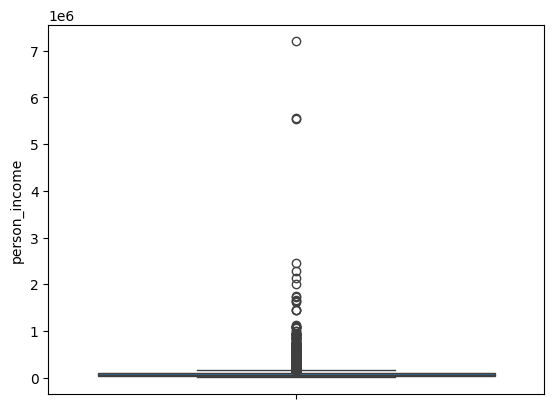

In [114]:
sns.boxplot(data=df['person_income'])

In [115]:
df['person_income'].mean()

np.float64(80319.05322222222)

## 2. Rellenar Datos Nulos

Este Título se salta debido a la no existencia de Datoa Nulos en el Data Set.

## 3. Imputación de datos.

Este Título se salta debido a la no existencia de Datoa Nulos en el Data Set.

## 4. Normalización de datos (pasar str a int o float)

### 4.1. Definir que columnas son tipo `Object`

In [ ]:
df.info() #Con esto podemos conocerlo pero ahora requerimos tenerlas almacenadas
          #en una variable para hacer el proceso mas facil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# Selección de Columnas Tipo Objecto

columnas_categoricas = df.select_dtypes(include='object')
columnas_categoricas.keys().tolist()

# COn esto ya tenemos almacenadas las columnas tipo Object

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [ ]:
# ahora queremos saber que valores contienen cada columna categorica

for col in columnas_categoricas.columns:
  print(columnas_categoricas[col].value_counts(), '\n\n')

person_gender
male      24841
female    20159
Name: count, dtype: int64 


person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 


person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 


loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 


previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 




In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:
# Me dio pereza cambiar cada valor individual
# o cambiarlo con un map asi que lo hago con un for

for col in columnas_categoricas:
  df[col] = df[col].astype('category').cat.codes

In [ ]:
# now we want to know what values each column contains after conversion

for col in df.columns:
  print(df[col].value_counts().sort_index(),'\n')

person_age
20.0       17
21.0     1289
22.0     4236
23.0     5254
24.0     5138
25.0     4507
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
56.0       20
57.0       17
58.0       20
59.0        6
60.0       16
61.0       12
62.0        7
63.0        3
64.0        7
65.0       10
66.0       11
67.0        1
69.0        5
70.0        7
73.0        3
76.0        1
78.0        1
80.0        1
84.0        1
94.0        1
109.0       1
116.0       1
123.0       2
144.0       3
Name: count, dtype: int64 

person_gender
0    20159
1    24841
Name: count, dtype: int64 

person_education
0    12028
1    13399
2      621
3    11

In [ ]:
# AHora vemos si los datos se convirtieron mirando el tipo de la columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int8   
 2   person_education                45000 non-null  int8   
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int8   
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int8   
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Con esto podemos observar que ya no existen datos tipo `object` y podemos hacer la matriz de correlación para luego hacer el mapa de calor

## 5. Matriz de Correlación

In [ ]:
matriz_corr = df.corr()
matriz_corr

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.017528,-0.014649,0.193698,0.954412,-0.039008,0.050750,0.032005,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476
person_gender,0.017528,1.000000,-0.002267,0.010173,0.015078,-0.001172,0.010647,-0.003107,0.003662,-0.000367,0.011999,-0.000223,0.000704,-0.000561
person_education,-0.014649,-0.002267,1.000000,0.000331,-0.012034,-0.000290,-0.002441,0.004356,0.000336,-0.006984,-0.014576,0.012498,-0.002669,-0.001747
person_income,0.193698,0.010173,0.000331,1.000000,0.185987,-0.219870,0.242290,0.008639,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,0.015078,-0.012034,0.185987,1.000000,-0.035884,0.044589,0.031230,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481
person_home_ownership,-0.039008,-0.001172,-0.000290,-0.219870,-0.035884,1.000000,-0.150243,0.001828,0.130437,0.148933,-0.029549,-0.006421,-0.125974,0.233842
loan_amnt,0.050750,0.010647,-0.002441,0.242290,0.044589,-0.150243,1.000000,-0.001068,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714
loan_intent,0.032005,-0.003107,0.004356,0.008639,0.031230,0.001828,-0.001068,1.000000,-0.005372,0.003269,0.030912,0.016244,0.038469,-0.072158
loan_int_rate,0.013402,0.003662,0.000336,0.001510,0.016631,0.130437,0.146093,-0.005372,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,-0.000367,-0.006984,-0.234177,-0.039862,0.148933,0.593011,0.003269,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880


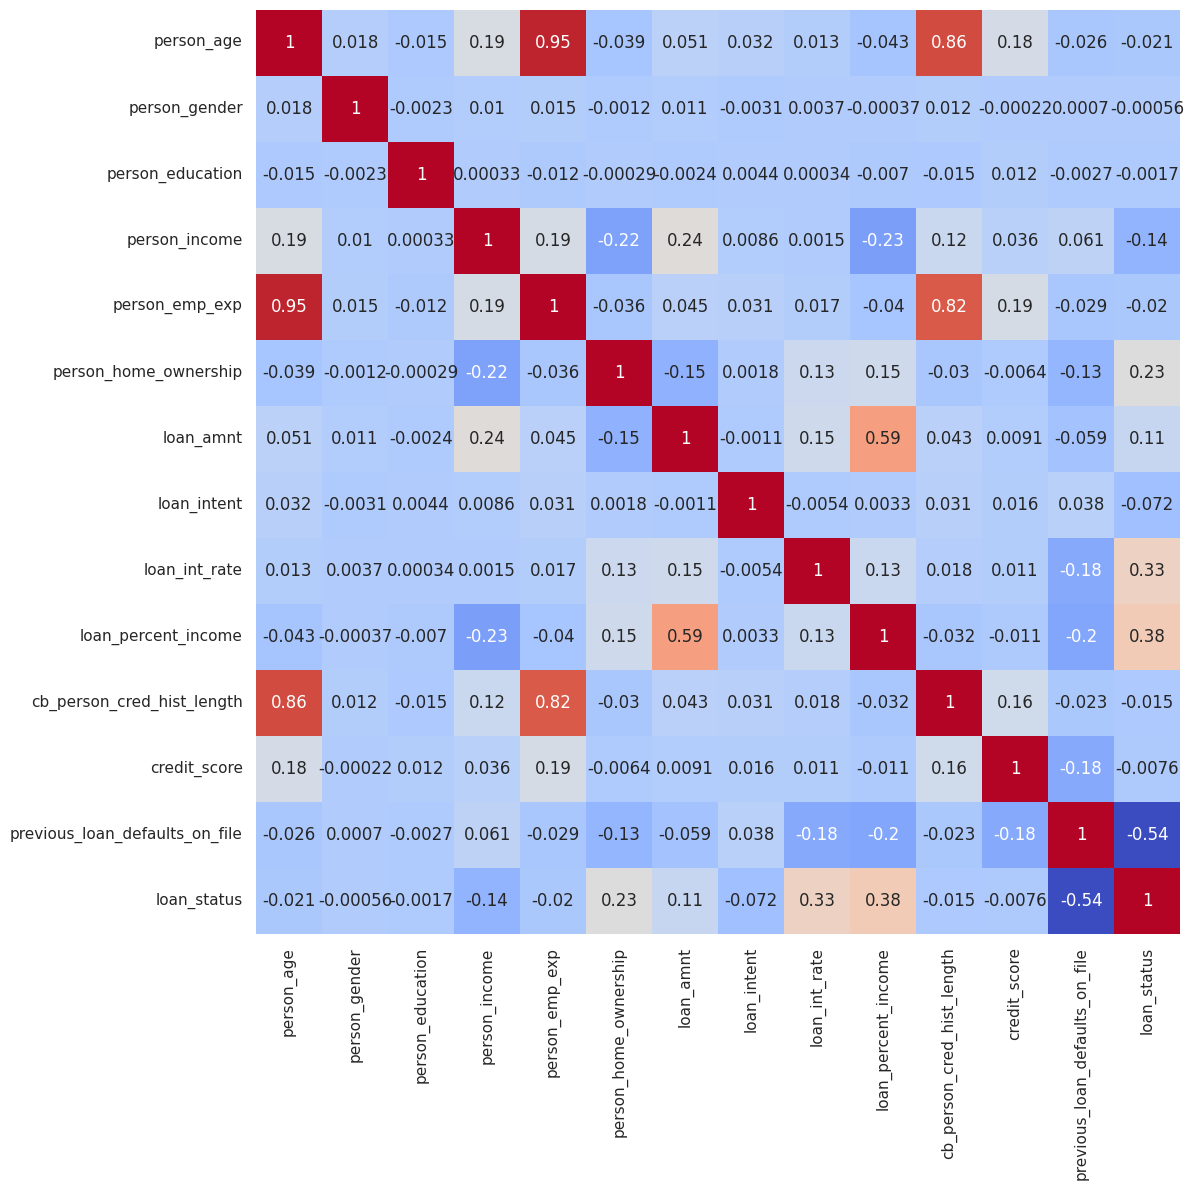

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', cbar=False, square=True)

plt.savefig('grafica.png')

## 6. Regresión Logistica

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int8   
 2   person_education                45000 non-null  int8   
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int8   
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int8   
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
# train_size=0.7, si se omite estos parametros de size, por defecto seria 75% train_size y test_size 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

y_train.value_counts()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,count
loan_status,
0,28010
1,7990


In [ ]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.83


In [ ]:
# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{confusion}')

Matriz de confusión:
[[6798  192]
 [1362  648]]


In [ ]:
# Calcular las métricas de efectividad (precisión, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6990
           1       0.77      0.32      0.45      2010

    accuracy                           0.83      9000
   macro avg       0.80      0.65      0.68      9000
weighted avg       0.82      0.83      0.80      9000



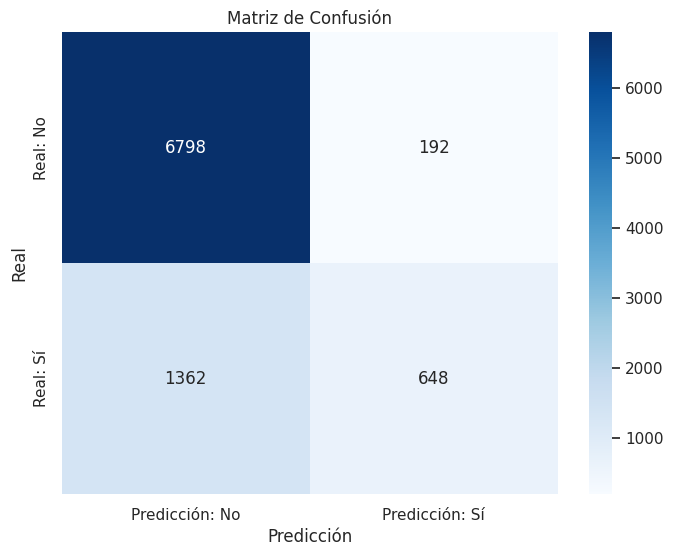

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicción: No', 'Predicción: Sí'], yticklabels=['Real: No', 'Real: Sí'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
# Calcular efectividad (precisión) del modelo (como ejemplo de métrica)
accuracy = (confusion[0,0] + confusion[1,1]) / confusion.sum()
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.83


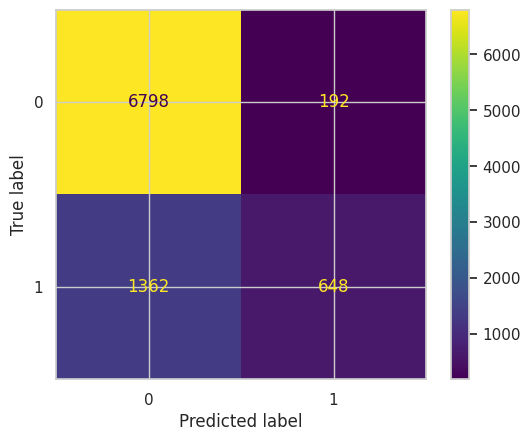

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

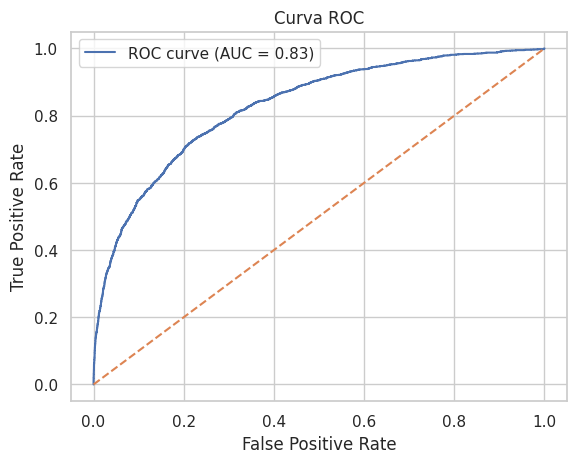

In [ ]:
# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
# Cálculo del AUC (Área bajo la curva) utilizando las etiquetas verdaderas y las probabilidades predichas
roc_auc = roc_auc_score(y_test, y_prob)
# Cálculo de la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr) para varios umbrales
fpr, tpr, _ = roc_curve(y_test, y_prob)
# Trazar la curva ROC utilizando la tasa de falsos positivos en el eje X y la tasa de verdaderos positivos en el eje Y
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
# Dibujar una línea diagonal que representa un clasificador aleatorio (sin discriminación)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')

# Mostrar la leyenda que incluye la información de la curva ROC
plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int8   
 2   person_education                45000 non-null  int8   
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int8   
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int8   
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# base de datos solo con columnas de valor caluroso

df_calor = df[['cb_person_cred_hist_length','person_age','person_emp_exp','loan_status']]

X = df_calor.drop('loan_status', axis=1)
y = df_calor['loan_status']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
# train_size=0.7, si se omite estos parametros de size, por defecto seria 75% train_size y test_size 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.78


In [ ]:
# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{confusion}')

Matriz de confusión:
[[6990    0]
 [2010    0]]


In [ ]:
# Calcular las métricas de efectividad (precisión, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6990
           1       0.00      0.00      0.00      2010

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


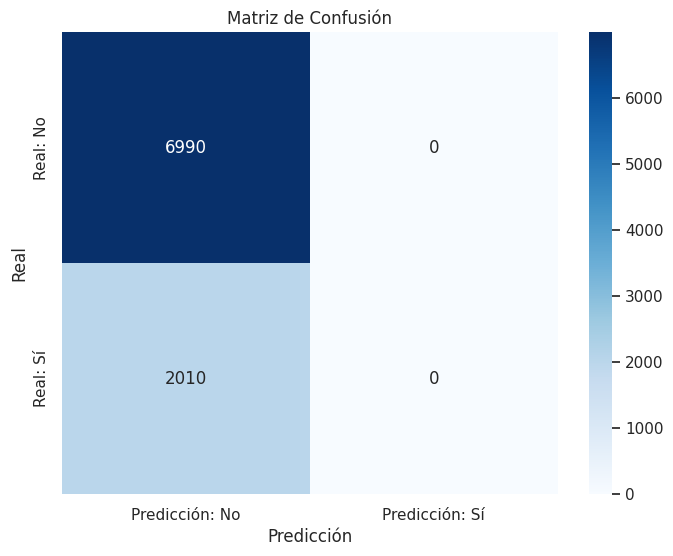

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicción: No', 'Predicción: Sí'], yticklabels=['Real: No', 'Real: Sí'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
# prueba de equilibrar el Dataframe

df_0 = df[df['loan_status']==0]
df_1 = df[df['loan_status']==1]

df_0

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
14,23.0,0,0,138998.0,0,3,35000.0,1,7.90,0.25,4.0,583,0,0
15,23.0,0,4,600891.0,5,0,30000.0,0,10.65,0.05,3.0,670,1,0
16,23.0,1,1,144943.0,0,3,35000.0,1,7.90,0.24,4.0,663,0,0
20,25.0,1,1,195718.0,0,3,35000.0,5,7.49,0.18,4.0,684,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42103,36.0,1,1,60006.0,15,2,2755.0,3,8.92,0.05,9.0,609,1,0
42104,25.0,0,1,64146.0,2,0,7200.0,5,10.28,0.11,3.0,625,1,0
42105,43.0,1,2,93061.0,21,0,12966.0,5,14.40,0.14,12.0,690,1,0
42106,28.0,0,3,110291.0,7,3,13453.0,5,13.29,0.12,6.0,631,1,0


In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 1 to 42107
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      35000 non-null  float64
 1   person_gender                   35000 non-null  int8   
 2   person_education                35000 non-null  int8   
 3   person_income                   35000 non-null  float64
 4   person_emp_exp                  35000 non-null  int64  
 5   person_home_ownership           35000 non-null  int8   
 6   loan_amnt                       35000 non-null  float64
 7   loan_intent                     35000 non-null  int8   
 8   loan_int_rate                   35000 non-null  float64
 9   loan_percent_income             35000 non-null  float64
 10  cb_person_cred_hist_length      35000 non-null  float64
 11  credit_score                    35000 non-null  int64  
 12  previous_loan_defaults_on_file  35000

In [ ]:
df_0 = df.sample(n=10000, random_state=42)
df_0.shape

(10000, 14)

In [ ]:
# Entrenar Modelo  equilibrado

df_balanced = pd.concat([df_0, df_1])

df_balanced.shape

X = df_balanced.drop('loan_status', axis=1)
y = df_balanced['loan_status']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
# train_size=0.7, si se omite estos parametros de size, por defecto seria 75% train_size y test_size 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{confusion}')

Matriz de confusión:
[[1463  882]
 [ 458 3197]]


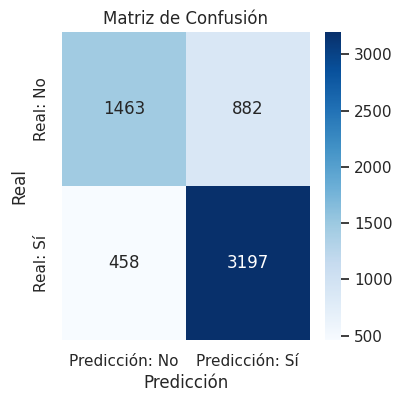

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicción: No', 'Predicción: Sí'], yticklabels=['Real: No', 'Real: Sí'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
df_balanced.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.014424,-0.016202,0.134115,0.954310,-0.052194,0.060502,0.011868,0.011919,-0.047020,0.874357,0.185556,0.001519,-0.033236
person_gender,0.014424,1.000000,0.007669,0.008746,0.013970,-0.001911,0.001252,-0.003495,0.010966,-0.003453,0.010942,0.002125,0.000796,-0.000513
person_education,-0.016202,0.007669,1.000000,0.003369,-0.014181,0.005405,-0.010536,-0.003451,-0.002558,-0.019411,-0.016854,0.011040,-0.005070,-0.004259
person_income,0.134115,0.008746,0.003369,1.000000,0.122710,-0.336207,0.349700,-0.011162,0.027216,-0.320719,0.117473,0.026983,0.168322,-0.232667
person_emp_exp,0.954310,0.013970,-0.014181,0.122710,1.000000,-0.047177,0.052715,0.012930,0.013248,-0.044710,0.838839,0.193067,0.002750,-0.035350
person_home_ownership,-0.052194,-0.001911,0.005405,-0.336207,-0.047177,1.000000,-0.082030,0.015905,0.094497,0.243456,-0.038487,-0.001903,-0.202095,0.282801
loan_amnt,0.060502,0.001252,-0.010536,0.349700,0.052715,-0.082030,1.000000,-0.010636,0.139382,0.588213,0.047181,0.013544,-0.082393,0.113538
loan_intent,0.011868,-0.003495,-0.003451,-0.011162,0.012930,0.015905,-0.010636,1.000000,-0.026607,0.017336,0.013247,0.024101,0.067168,-0.089683
loan_int_rate,0.011919,0.010966,-0.002558,0.027216,0.013248,0.094497,0.139382,-0.026607,1.000000,0.043605,0.014242,0.015243,-0.266397,0.363335
loan_percent_income,-0.047020,-0.003453,-0.019411,-0.320719,-0.044710,0.243456,0.588213,0.017336,0.043605,1.000000,-0.036142,-0.009410,-0.274729,0.376800


<Axes: >

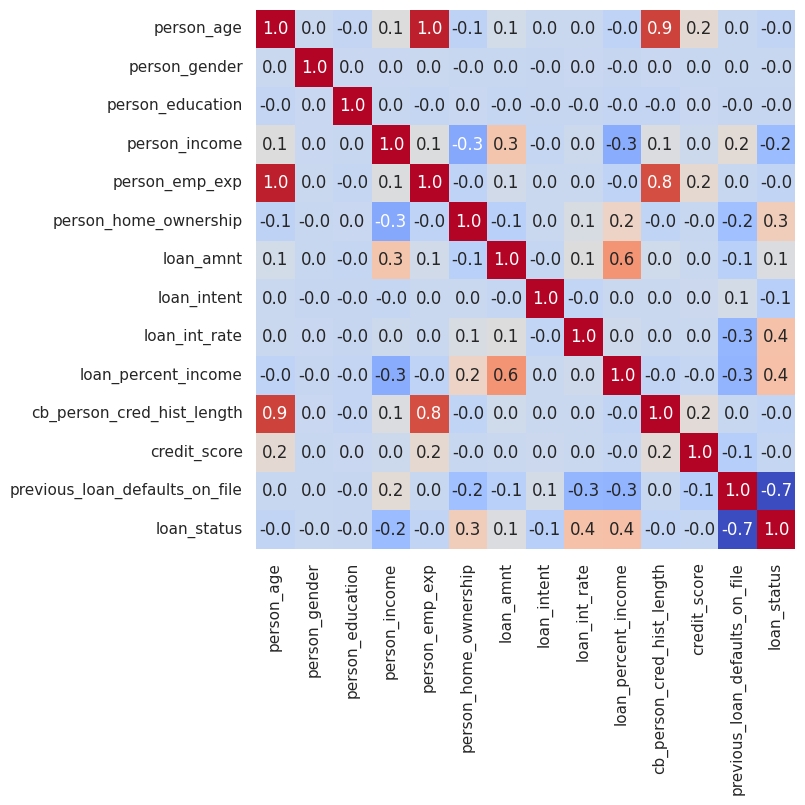

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df_balanced.corr(), annot=True,cmap='coolwarm', cbar=False, square=True, fmt='.1f')

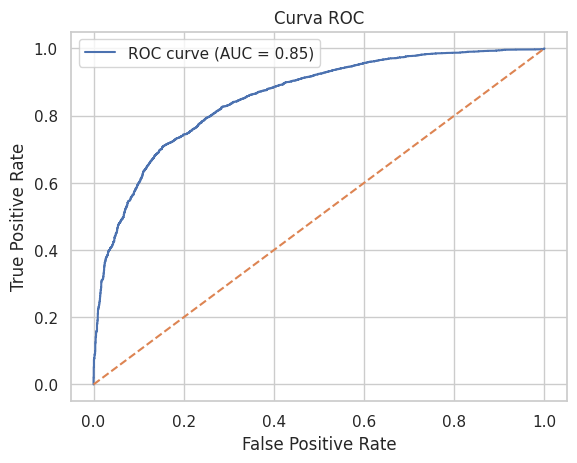

In [ ]:
# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
# Cálculo del AUC (Área bajo la curva) utilizando las etiquetas verdaderas y las probabilidades predichas
roc_auc = roc_auc_score(y_test, y_prob)
# Cálculo de la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr) para varios umbrales
fpr, tpr, _ = roc_curve(y_test, y_prob)
# Trazar la curva ROC utilizando la tasa de falsos positivos en el eje X y la tasa de verdaderos positivos en el eje Y
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
# Dibujar una línea diagonal que representa un clasificador aleatorio (sin discriminación)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')

# Mostrar la leyenda que incluye la información de la curva ROC
plt.legend()
plt.show()